In [62]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

# 1. Cvičenie 
 
## Pre systém v tvare $\dot{x}(t)=ax(t)+bu(t)$
Kde $b = 1$ a $a$ je neznáme

- Systém je prvého rádu
- Prenosová funkcia je $S(s)=\frac{1}{s-a}$ 
- Charakteristický polynóm: $s-a$
- Charakteristická rovnica: $s-a=0$
- Systém je stabilný pre $a < 0$ a nestabilný pre $a > 0$
- Zosilnenie je 1 a časová konštanta je 1
- Príkladom môže byť dolnopriepustný filter (elektronický)
## Úloha 2: Zostavte simulačnú schému
Kde $x(0)=1$ a $u(t)=0$
---
![Simulačná schéma systému](schm_1.png)

Štart simulácie: 0 [s]; Koniec simulácie: 10 [s]; Krok: 0.1 [s]
Zvolené a = -1


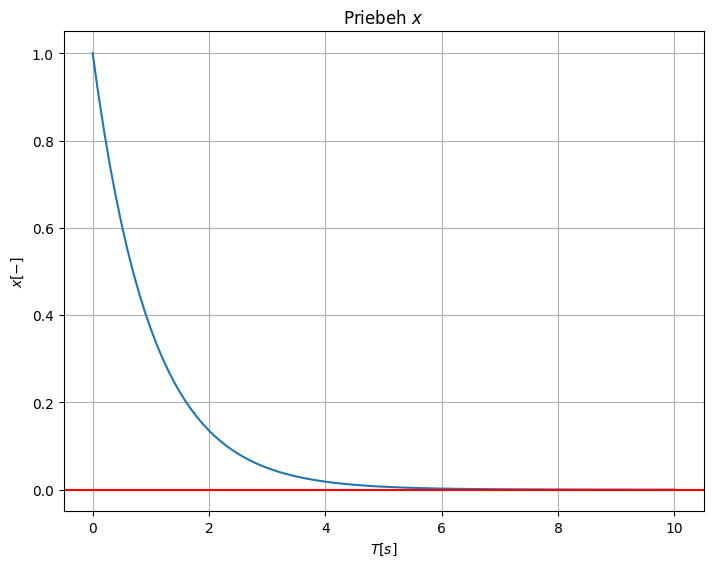

In [63]:
# Known vars
b = 1
x_start = 1
u_start = 0

sim_start = 0
sim_end = 10
sim_step = 0.1

print(f"Štart simulácie: {sim_start} [s]; Koniec simulácie: {sim_end} [s]; Krok: {sim_step} [s]")

def sim_fn1 (x,t,u,a,b):
    return a*x + u*b

def sim_it(sim_fn, sim_start, sim_end, sim_step, *args):
    time_vec = np.arange(sim_start,sim_end + sim_step, sim_step).reshape(-1,1)

    sim_out = odeint(sim_fn,args[0],time_vec[:,0], args=args[1:])
    return [time_vec, sim_out]
    
def printPlot(x_val, y_val, title:str = "", xLabel:str = "", yLabel:str = ""):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(x_val, y_val)
    ax.axhline(y=0,color='r',linestyle='-')
    ax.set_title(title)
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.grid()

a = -1
print(f"Zvolené a = {a}")
t,o = sim_it(sim_fn1, sim_start, sim_end, sim_step, x_start,u_start,a,b)
%matplotlib inline
printPlot(t,o,"Priebeh $x$","$T [s]$","$x [-]$")

## Úloha 3: zvoľte $a$, tak aby bol systém nestabilný a neskôr k nemu pridajte regulátor v tvare $u=-kx$
- kde $k > |a|$

Zvolené a = 1


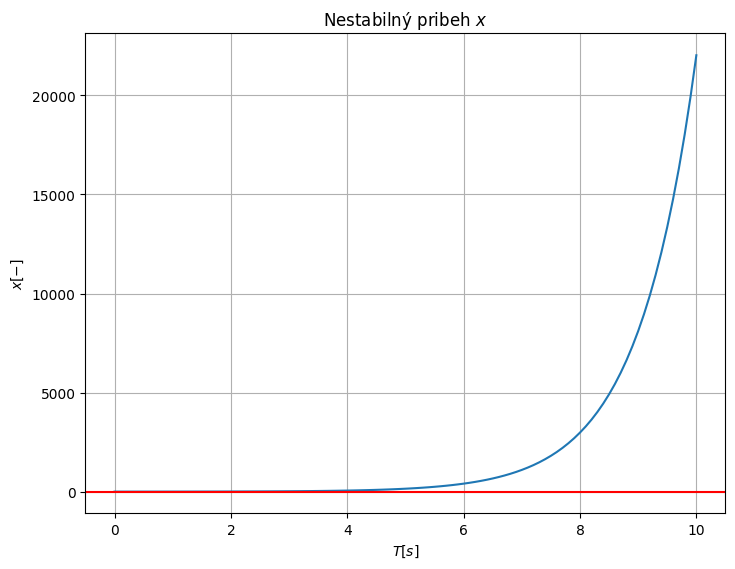

In [64]:
a = 1
print(f"Zvolené a = {a}")
t,o = sim_it(sim_fn1,sim_start,sim_end,sim_step,x_start,u_start,a,b)
%matplotlib inline
printPlot(t,o,"Nestabilný pribeh $x$","$T[s]$","$x[-]$")

Schéma zapojenia regulátora s $k = 2$
---
![Simulačná schéma systému s regulátorom](schm_2.png)

Hodnota k = 2


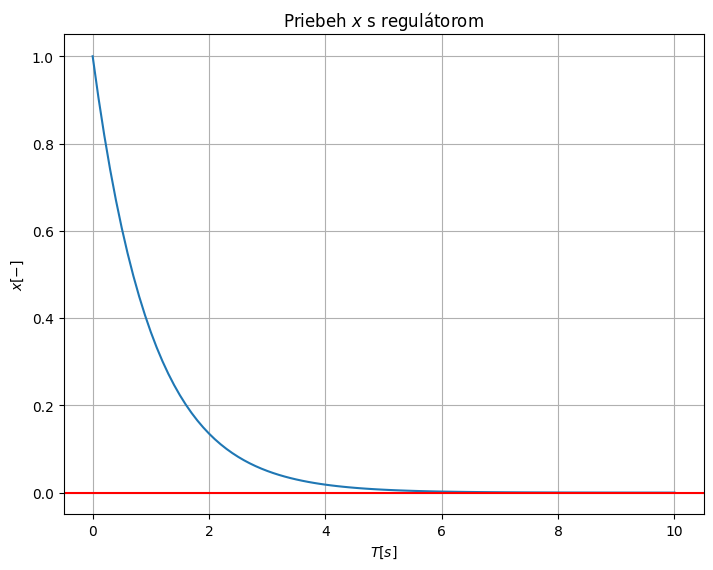

In [65]:
def sim_fn2(x,t,a,b,k):
    u = -k*x
    return a*x + b*u
k = 2
print(f"Hodnota k = {k}")
t,o = sim_it(sim_fn2, sim_start, sim_end, sim_step, x_start, a, b, k)

%matplotlib inline
printPlot(t,o,"Priebeh $x$ s regulátorom","$T [s]$","$x [-]$")


## Úloha 4: Zmeňte predpis regulátora na $u = -kx$
- kde $\dot{k} = x^2$

## Schéma
---
![Simulačná schéma systému s regulátorom](schm_3.png)

Štart simulácie: 0 [s]; Koniec simulácie: 10 [s]; Krok: 0.1 [s]


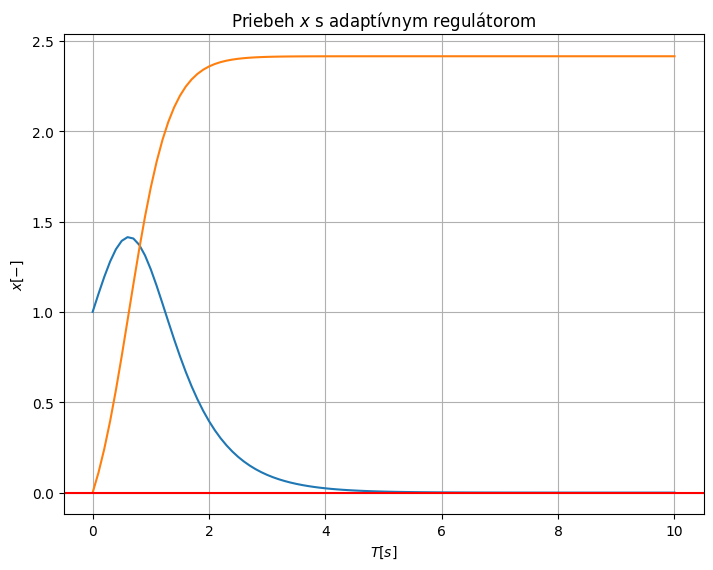

In [66]:
def sim_fn3(x_,t,a,b):
    x,k = x_
    k_dot = x*x
    u = -k*x
    x_dot = a*x + b*u
    
    return[x_dot, k_dot]

sim_end = 10
x_start = [1,0]

print(f"Štart simulácie: {sim_start} [s]; Koniec simulácie: {sim_end} [s]; Krok: {sim_step} [s]")

t,o = sim_it(sim_fn3, sim_start, sim_end, sim_step, x_start, a, b)

%matplotlib inline
printPlot(t,o,"Priebeh $x$ s adaptívnym regulátorom","$T [s]$","$x [-]$")

Štart simulácie: 0 [s]; Koniec simulácie: 1 [s]; Krok: 0.001 [s]

Prvý graf
Hodnota a = 50

Druhý graf
Hodnota a = 700


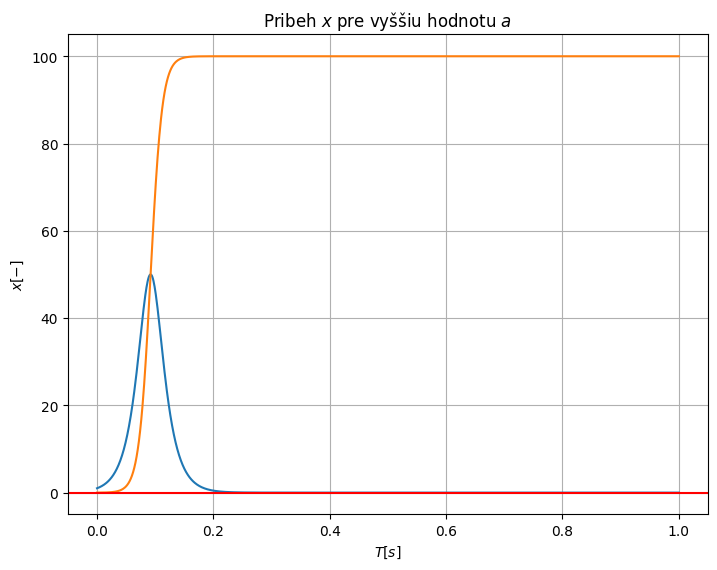

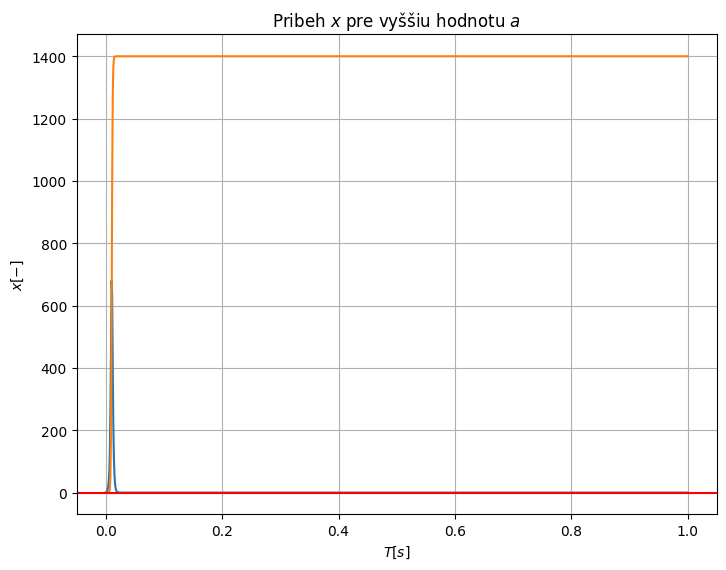

In [67]:
sim_end = 1
sim_step = 0.001
print(f"Štart simulácie: {sim_start} [s]; Koniec simulácie: {sim_end} [s]; Krok: {sim_step} [s]")

a = 50
print("\nPrvý graf")
print(f"Hodnota a = {a}")

t,o = sim_it(sim_fn3,sim_start,sim_end,sim_step,x_start,a,b)

%matplotlib inline
printPlot(t,o,"Pribeh $x$ pre vyššiu hodnotu $a$","$T [s]$", "$x [-]$")

a = 700
print("\nDruhý graf")
print(f"Hodnota a = {a}")

t,o = sim_it(sim_fn3,sim_start,sim_end,sim_step,x_start,a,b)

%matplotlib inline
printPlot(t,o,"Pribeh $x$ pre vyššiu hodnotu $a$","$T [s]$", "$x [-]$")